In [43]:
import os
import time
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn as nil
from nilearn import plotting
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
# ensure directory structure includes 'nitorch' from https://github.com/moboehle/Pytorch-LRP/tree/master/nitorch,
# as there are other packages named 'nitorch' that will not work here
from nitorch import callbacks, trainer, inference, metrics
from nitorch.metrics import balanced_accuracy
from nitorch.callbacks import ModelCheckpoint, EarlyStopping

seed = 1234

# Read in data
## Ensure that file paths match your directory structure
## Files must be in .nii format

In [44]:
# useful BASH command for moving files from ADNI download: find ADNI -type f -exec mv -t . {} +
dir = ('./PET_Data/PET_training/') # change this to directory with PET images     
files = os.listdir(dir)

# read in CSV description of downloaded PET scans
df = pd.read_csv('./PET_Data/PET_csv/PET_Training_4_28_2021.csv')

# create x and y arrays
group = []
for i in range(len(files)):
    idx = files[i][5:15]
    group.append(df.loc[df.Subject==idx,'Group'].values[0]) 
group = ((np.array(group) == 'AD') / 1)
ims = np.array([nib.load(dir + file).get_fdata()[:,:,30:70:4] for file in files])
print(ims.shape)
print(group.shape)

(641, 160, 160, 10, 1)
(641,)


# Build an ensemble based on specified slices
## Make to specify a directory to save the sub-models in the `model_path` field

Starting slice 0
torch.Size([576, 1, 160, 160])
torch.Size([65, 1, 160, 160])
(576,)
(65,)
89.0
10.0
C:/Users/Ben/Desktop/Collection1/trained_cn_ad_pet_2
Starting trial 0


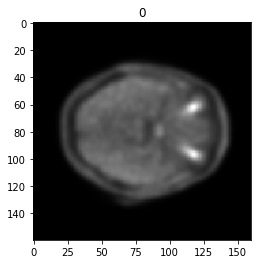

[0,    60] loss: 0.41282
[0,   120] loss: 0.43381
Time elapsed: 0h:0m:4s
train accuracy_score: 82.81 %
val accuracy_score: 84.62 %
Val loss: 0.302961
[1,    60] loss: 0.31219
[1,   120] loss: 0.35736
Time elapsed: 0h:0m:9s
train accuracy_score: 88.02 %
val accuracy_score: 87.69 %
Val loss: 0.238839
[2,    60] loss: 0.28502
[2,   120] loss: 0.26308
Time elapsed: 0h:0m:15s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.212392
[3,    60] loss: 0.26841
[3,   120] loss: 0.24531
Time elapsed: 0h:0m:21s
train accuracy_score: 89.76 %
val accuracy_score: 90.77 %
Val loss: 0.193950
[4,    60] loss: 0.26461
[4,   120] loss: 0.22848
Time elapsed: 0h:0m:27s
train accuracy_score: 90.28 %
val accuracy_score: 92.31 %
Val loss: 0.187319
[5,    60] loss: 0.20606
[5,   120] loss: 0.25035
Time elapsed: 0h:0m:33s
train accuracy_score: 91.32 %
val accuracy_score: 92.31 %
Val loss: 0.172210
[6,    60] loss: 0.19593
[6,   120] loss: 0.25169
Time elapsed: 0h:0m:38s
train accuracy_score: 

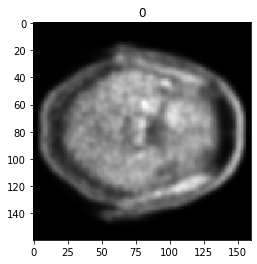

[0,    60] loss: 0.50384
[0,   120] loss: 0.44738
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 84.62 %
Val loss: 0.298065
[1,    60] loss: 0.35024
[1,   120] loss: 0.30176
Time elapsed: 0h:0m:11s
train accuracy_score: 86.98 %
val accuracy_score: 89.23 %
Val loss: 0.264504
[2,    60] loss: 0.26208
[2,   120] loss: 0.34473
Time elapsed: 0h:0m:17s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.222685
[3,    60] loss: 0.23972
[3,   120] loss: 0.32477
Time elapsed: 0h:0m:23s
train accuracy_score: 89.93 %
val accuracy_score: 90.77 %
Val loss: 0.216375
[4,    60] loss: 0.25814
[4,   120] loss: 0.25933
Time elapsed: 0h:0m:29s
train accuracy_score: 90.45 %
val accuracy_score: 90.77 %
Val loss: 0.183605
[5,    60] loss: 0.27504
[5,   120] loss: 0.23964
Time elapsed: 0h:0m:35s
train accuracy_score: 90.28 %
val accuracy_score: 92.31 %
Val loss: 0.169608
[6,    60] loss: 0.27073
[6,   120] loss: 0.21298
Time elapsed: 0h:0m:41s
train accuracy_score:

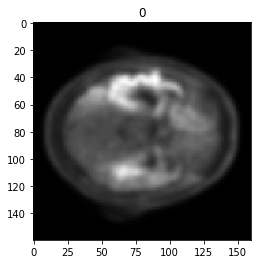

[0,    60] loss: 0.51013
[0,   120] loss: 0.32242
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 87.69 %
Val loss: 0.281341
[1,    60] loss: 0.34501
[1,   120] loss: 0.27056
Time elapsed: 0h:0m:11s
train accuracy_score: 88.37 %
val accuracy_score: 92.31 %
Val loss: 0.265915
[2,    60] loss: 0.28899
[2,   120] loss: 0.26747
Time elapsed: 0h:0m:17s
train accuracy_score: 89.41 %
val accuracy_score: 90.77 %
Val loss: 0.197423
[3,    60] loss: 0.32231
[3,   120] loss: 0.23561
Time elapsed: 0h:0m:23s
train accuracy_score: 90.10 %
val accuracy_score: 90.77 %
Val loss: 0.184246
[4,    60] loss: 0.25230
[4,   120] loss: 0.27596
Time elapsed: 0h:0m:29s
train accuracy_score: 90.80 %
val accuracy_score: 90.77 %
Val loss: 0.176941
[5,    60] loss: 0.24644
[5,   120] loss: 0.26333
Time elapsed: 0h:0m:35s
train accuracy_score: 90.28 %
val accuracy_score: 93.85 %
Val loss: 0.165710
[6,    60] loss: 0.24244
[6,   120] loss: 0.20252
Time elapsed: 0h:0m:42s
train accuracy_score:

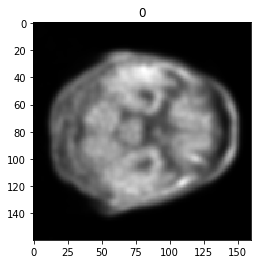

[0,    60] loss: 0.50664
[0,   120] loss: 0.37562
Time elapsed: 0h:0m:5s
train accuracy_score: 83.33 %
val accuracy_score: 86.15 %
Val loss: 0.310175
[1,    60] loss: 0.33220
[1,   120] loss: 0.30372
Time elapsed: 0h:0m:11s
train accuracy_score: 87.15 %
val accuracy_score: 89.23 %
Val loss: 0.243261
[2,    60] loss: 0.31240
[2,   120] loss: 0.29483
Time elapsed: 0h:0m:17s
train accuracy_score: 88.02 %
val accuracy_score: 90.77 %
Val loss: 0.211131
[3,    60] loss: 0.32528
[3,   120] loss: 0.23716
Time elapsed: 0h:0m:22s
train accuracy_score: 89.93 %
val accuracy_score: 92.31 %
Val loss: 0.193904
[4,    60] loss: 0.31615
[4,   120] loss: 0.17719
Time elapsed: 0h:0m:28s
train accuracy_score: 89.76 %
val accuracy_score: 89.23 %
Val loss: 0.181842
[5,    60] loss: 0.22914
[5,   120] loss: 0.24693
Time elapsed: 0h:0m:34s
train accuracy_score: 90.80 %
val accuracy_score: 89.23 %
Val loss: 0.158715
[6,    60] loss: 0.24073
[6,   120] loss: 0.25127
Time elapsed: 0h:0m:40s
train accuracy_score:

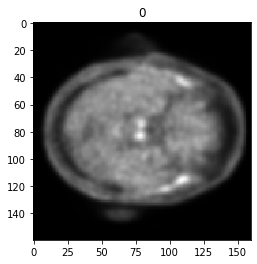

[0,    60] loss: 0.44234
[0,   120] loss: 0.40921
Time elapsed: 0h:0m:5s
train accuracy_score: 83.68 %
val accuracy_score: 84.62 %
Val loss: 0.292602
[1,    60] loss: 0.33509
[1,   120] loss: 0.32828
Time elapsed: 0h:0m:11s
train accuracy_score: 86.63 %
val accuracy_score: 90.77 %
Val loss: 0.212599
[2,    60] loss: 0.25506
[2,   120] loss: 0.31940
Time elapsed: 0h:0m:17s
train accuracy_score: 89.06 %
val accuracy_score: 90.77 %
Val loss: 0.197811
[3,    60] loss: 0.27530
[3,   120] loss: 0.20783
Time elapsed: 0h:0m:22s
train accuracy_score: 89.76 %
val accuracy_score: 92.31 %
Val loss: 0.202231
[4,    60] loss: 0.24625
[4,   120] loss: 0.25594
Time elapsed: 0h:0m:28s
train accuracy_score: 91.49 %
val accuracy_score: 90.77 %
Val loss: 0.254706
[5,    60] loss: 0.25845
[5,   120] loss: 0.22967
Time elapsed: 0h:0m:34s
train accuracy_score: 91.84 %
val accuracy_score: 93.85 %
Val loss: 0.153295
[6,    60] loss: 0.18165
[6,   120] loss: 0.22803
Time elapsed: 0h:0m:39s
train accuracy_score:

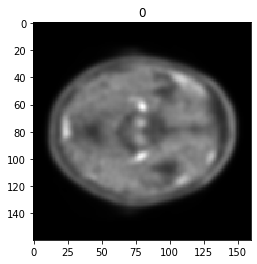

[0,    60] loss: 0.46118
[0,   120] loss: 0.40910
Time elapsed: 0h:0m:5s
train accuracy_score: 83.51 %
val accuracy_score: 84.62 %
Val loss: 0.341458
[1,    60] loss: 0.34978
[1,   120] loss: 0.32508
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 89.23 %
Val loss: 0.277685
[2,    60] loss: 0.29454
[2,   120] loss: 0.34835
Time elapsed: 0h:0m:17s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.257319
[3,    60] loss: 0.25288
[3,   120] loss: 0.30403
Time elapsed: 0h:0m:22s
train accuracy_score: 90.62 %
val accuracy_score: 89.23 %
Val loss: 0.278185
[4,    60] loss: 0.26936
[4,   120] loss: 0.25738
Time elapsed: 0h:0m:28s
train accuracy_score: 89.93 %
val accuracy_score: 90.77 %
Val loss: 0.249346
[5,    60] loss: 0.24417
[5,   120] loss: 0.24169
Time elapsed: 0h:0m:34s
train accuracy_score: 90.45 %
val accuracy_score: 89.23 %
Val loss: 0.245892
[6,    60] loss: 0.24772
[6,   120] loss: 0.23877
Time elapsed: 0h:0m:40s
train accuracy_score:

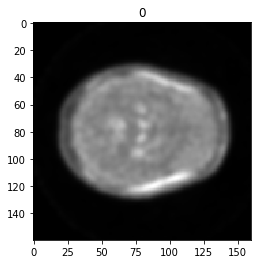

[0,    60] loss: 0.48134
[0,   120] loss: 0.38524
Time elapsed: 0h:0m:5s
train accuracy_score: 83.85 %
val accuracy_score: 87.69 %
Val loss: 0.309342
[1,    60] loss: 0.32484
[1,   120] loss: 0.36444
Time elapsed: 0h:0m:10s
train accuracy_score: 87.15 %
val accuracy_score: 87.69 %
Val loss: 0.273326
[2,    60] loss: 0.28357
[2,   120] loss: 0.29896
Time elapsed: 0h:0m:16s
train accuracy_score: 88.72 %
val accuracy_score: 89.23 %
Val loss: 0.248583
[3,    60] loss: 0.27427
[3,   120] loss: 0.25003
Time elapsed: 0h:0m:22s
train accuracy_score: 90.45 %
val accuracy_score: 87.69 %
Val loss: 0.238587
[4,    60] loss: 0.24027
[4,   120] loss: 0.22610
Time elapsed: 0h:0m:27s
train accuracy_score: 90.80 %
val accuracy_score: 86.15 %
Val loss: 0.311109
[5,    60] loss: 0.25506
[5,   120] loss: 0.24569
Time elapsed: 0h:0m:33s
train accuracy_score: 90.80 %
val accuracy_score: 87.69 %
Val loss: 0.225032
[6,    60] loss: 0.25856
[6,   120] loss: 0.22877
Time elapsed: 0h:0m:38s
train accuracy_score:

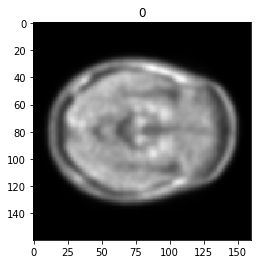

[0,    60] loss: 0.54760
[0,   120] loss: 0.38637
Time elapsed: 0h:0m:5s
train accuracy_score: 83.85 %
val accuracy_score: 84.62 %
Val loss: 0.354709
[1,    60] loss: 0.37274
[1,   120] loss: 0.36526
Time elapsed: 0h:0m:11s
train accuracy_score: 86.63 %
val accuracy_score: 89.23 %
Val loss: 0.300778
[2,    60] loss: 0.30280
[2,   120] loss: 0.31898
Time elapsed: 0h:0m:17s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.273575
[3,    60] loss: 0.22468
[3,   120] loss: 0.36515
Time elapsed: 0h:0m:22s
train accuracy_score: 88.19 %
val accuracy_score: 87.69 %
Val loss: 0.266392
[4,    60] loss: 0.21439
[4,   120] loss: 0.29189
Time elapsed: 0h:0m:28s
train accuracy_score: 90.97 %
val accuracy_score: 87.69 %
Val loss: 0.240473
[5,    60] loss: 0.28327
[5,   120] loss: 0.19698
Time elapsed: 0h:0m:34s
train accuracy_score: 90.10 %
val accuracy_score: 90.77 %
Val loss: 0.273779
[6,    60] loss: 0.27108
[6,   120] loss: 0.22583
Time elapsed: 0h:0m:39s
train accuracy_score:

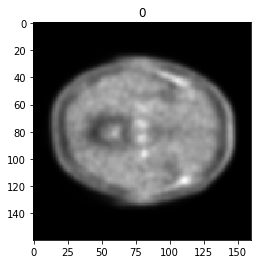

[0,    60] loss: 0.49987
[0,   120] loss: 0.40069
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 86.15 %
Val loss: 0.307520
[1,    60] loss: 0.36445
[1,   120] loss: 0.33475
Time elapsed: 0h:0m:11s
train accuracy_score: 89.06 %
val accuracy_score: 90.77 %
Val loss: 0.264456
[2,    60] loss: 0.32442
[2,   120] loss: 0.30063
Time elapsed: 0h:0m:17s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.243817
[3,    60] loss: 0.27180
[3,   120] loss: 0.32068
Time elapsed: 0h:0m:23s
train accuracy_score: 90.10 %
val accuracy_score: 90.77 %
Val loss: 0.241418
[4,    60] loss: 0.29385
[4,   120] loss: 0.20783
Time elapsed: 0h:0m:29s
train accuracy_score: 90.28 %
val accuracy_score: 92.31 %
Val loss: 0.256815
[5,    60] loss: 0.20218
[5,   120] loss: 0.26323
Time elapsed: 0h:0m:35s
train accuracy_score: 92.01 %
val accuracy_score: 89.23 %
Val loss: 0.242007
[6,    60] loss: 0.25132
[6,   120] loss: 0.23377
Time elapsed: 0h:0m:41s
train accuracy_score:

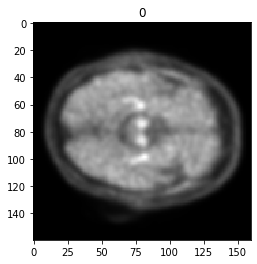

[0,    60] loss: 0.48764
[0,   120] loss: 0.41450
Time elapsed: 0h:0m:5s
train accuracy_score: 82.12 %
val accuracy_score: 86.15 %
Val loss: 0.313434
[1,    60] loss: 0.35300
[1,   120] loss: 0.35923
Time elapsed: 0h:0m:12s
train accuracy_score: 87.15 %
val accuracy_score: 89.23 %
Val loss: 0.279704
[2,    60] loss: 0.29553
[2,   120] loss: 0.33293
Time elapsed: 0h:0m:18s
train accuracy_score: 87.85 %
val accuracy_score: 90.77 %
Val loss: 0.261475
[3,    60] loss: 0.35975
[3,   120] loss: 0.21871
Time elapsed: 0h:0m:24s
train accuracy_score: 88.37 %
val accuracy_score: 87.69 %
Val loss: 0.252493
[4,    60] loss: 0.33587
[4,   120] loss: 0.26638
Time elapsed: 0h:0m:30s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.247842
[5,    60] loss: 0.28856
[5,   120] loss: 0.30056
Time elapsed: 0h:0m:36s
train accuracy_score: 89.76 %
val accuracy_score: 90.77 %
Val loss: 0.278787
[6,    60] loss: 0.26129
[6,   120] loss: 0.25564
Time elapsed: 0h:0m:43s
train accuracy_score:

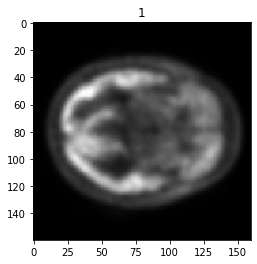

[0,    60] loss: 0.51557
[0,   120] loss: 0.33795
Time elapsed: 0h:0m:5s
train accuracy_score: 84.55 %
val accuracy_score: 83.08 %
Val loss: 0.401662
[1,    60] loss: 0.35652
[1,   120] loss: 0.34101
Time elapsed: 0h:0m:11s
train accuracy_score: 87.50 %
val accuracy_score: 89.23 %
Val loss: 0.319916
[2,    60] loss: 0.31310
[2,   120] loss: 0.32640
Time elapsed: 0h:0m:16s
train accuracy_score: 89.41 %
val accuracy_score: 86.15 %
Val loss: 0.311985
[3,    60] loss: 0.33461
[3,   120] loss: 0.33717
Time elapsed: 0h:0m:22s
train accuracy_score: 88.89 %
val accuracy_score: 87.69 %
Val loss: 0.309582
[4,    60] loss: 0.30419
[4,   120] loss: 0.27029
Time elapsed: 0h:0m:28s
train accuracy_score: 89.41 %
val accuracy_score: 89.23 %
Val loss: 0.331039
[5,    60] loss: 0.30117
[5,   120] loss: 0.25882
Time elapsed: 0h:0m:34s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.317365
[6,    60] loss: 0.27887
[6,   120] loss: 0.26246
Time elapsed: 0h:0m:39s
train accuracy_score:

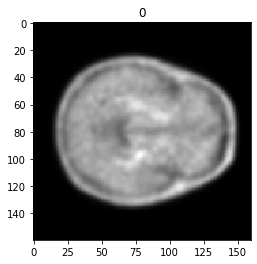

[0,    60] loss: 0.44377
[0,   120] loss: 0.40204
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 84.62 %
Val loss: 0.353544
[1,    60] loss: 0.38985
[1,   120] loss: 0.30091
Time elapsed: 0h:0m:11s
train accuracy_score: 86.28 %
val accuracy_score: 90.77 %
Val loss: 0.312434
[2,    60] loss: 0.27593
[2,   120] loss: 0.34128
Time elapsed: 0h:0m:17s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.301019
[3,    60] loss: 0.29198
[3,   120] loss: 0.26446
Time elapsed: 0h:0m:22s
train accuracy_score: 90.45 %
val accuracy_score: 86.15 %
Val loss: 0.303165
[4,    60] loss: 0.27047
[4,   120] loss: 0.26203
Time elapsed: 0h:0m:28s
train accuracy_score: 89.41 %
val accuracy_score: 86.15 %
Val loss: 0.294528
[5,    60] loss: 0.24360
[5,   120] loss: 0.31009
Time elapsed: 0h:0m:34s
train accuracy_score: 91.67 %
val accuracy_score: 89.23 %
Val loss: 0.276114
[6,    60] loss: 0.27082
[6,   120] loss: 0.25043
Time elapsed: 0h:0m:41s
train accuracy_score:

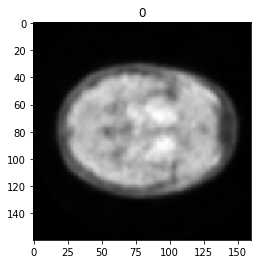

[0,    60] loss: 0.40757
[0,   120] loss: 0.41768
Time elapsed: 0h:0m:6s
train accuracy_score: 84.03 %
val accuracy_score: 86.15 %
Val loss: 0.402475
[1,    60] loss: 0.38005
[1,   120] loss: 0.36015
Time elapsed: 0h:0m:12s
train accuracy_score: 86.98 %
val accuracy_score: 87.69 %
Val loss: 0.321924
[2,    60] loss: 0.33187
[2,   120] loss: 0.34121
Time elapsed: 0h:0m:18s
train accuracy_score: 88.72 %
val accuracy_score: 87.69 %
Val loss: 0.311657
[3,    60] loss: 0.31284
[3,   120] loss: 0.30851
Time elapsed: 0h:0m:23s
train accuracy_score: 88.72 %
val accuracy_score: 87.69 %
Val loss: 0.303709
[4,    60] loss: 0.26696
[4,   120] loss: 0.32942
Time elapsed: 0h:0m:29s
train accuracy_score: 88.72 %
val accuracy_score: 89.23 %
Val loss: 0.295621
[5,    60] loss: 0.31042
[5,   120] loss: 0.23650
Time elapsed: 0h:0m:35s
train accuracy_score: 90.28 %
val accuracy_score: 87.69 %
Val loss: 0.305619
[6,    60] loss: 0.30207
[6,   120] loss: 0.25314
Time elapsed: 0h:0m:41s
train accuracy_score:

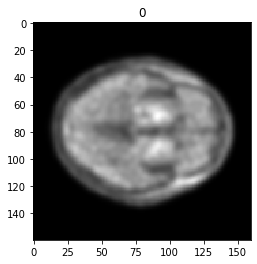

[0,    60] loss: 0.42433
[0,   120] loss: 0.36649
Time elapsed: 0h:0m:5s
train accuracy_score: 85.59 %
val accuracy_score: 89.23 %
Val loss: 0.328637
[1,    60] loss: 0.34361
[1,   120] loss: 0.30791
Time elapsed: 0h:0m:11s
train accuracy_score: 88.37 %
val accuracy_score: 86.15 %
Val loss: 0.314249
[2,    60] loss: 0.30318
[2,   120] loss: 0.28857
Time elapsed: 0h:0m:16s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.303660
[3,    60] loss: 0.27099
[3,   120] loss: 0.30091
Time elapsed: 0h:0m:22s
train accuracy_score: 87.85 %
val accuracy_score: 87.69 %
Val loss: 0.285822
[4,    60] loss: 0.34318
[4,   120] loss: 0.26682
Time elapsed: 0h:0m:28s
train accuracy_score: 90.10 %
val accuracy_score: 90.77 %
Val loss: 0.271010
[5,    60] loss: 0.24056
[5,   120] loss: 0.31467
Time elapsed: 0h:0m:33s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.269243
[6,    60] loss: 0.23545
[6,   120] loss: 0.22609
Time elapsed: 0h:0m:39s
train accuracy_score:

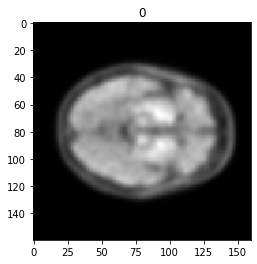

[0,    60] loss: 0.52563
[0,   120] loss: 0.38441
Time elapsed: 0h:0m:5s
train accuracy_score: 82.81 %
val accuracy_score: 84.62 %
Val loss: 0.366116
[1,    60] loss: 0.38348
[1,   120] loss: 0.32220
Time elapsed: 0h:0m:11s
train accuracy_score: 88.02 %
val accuracy_score: 89.23 %
Val loss: 0.334341
[2,    60] loss: 0.32180
[2,   120] loss: 0.33089
Time elapsed: 0h:0m:16s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.308128
[3,    60] loss: 0.24602
[3,   120] loss: 0.35393
Time elapsed: 0h:0m:22s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.292902
[4,    60] loss: 0.27633
[4,   120] loss: 0.26775
Time elapsed: 0h:0m:27s
train accuracy_score: 90.10 %
val accuracy_score: 89.23 %
Val loss: 0.274444
[5,    60] loss: 0.28737
[5,   120] loss: 0.24182
Time elapsed: 0h:0m:33s
train accuracy_score: 89.41 %
val accuracy_score: 89.23 %
Val loss: 0.270014
[6,    60] loss: 0.23897
[6,   120] loss: 0.23833
Time elapsed: 0h:0m:39s
train accuracy_score:

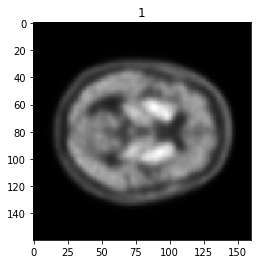

[0,    60] loss: 0.53352
[0,   120] loss: 0.37803
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 89.23 %
Val loss: 0.329302
[1,    60] loss: 0.30630
[1,   120] loss: 0.35620
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.307150
[2,    60] loss: 0.32232
[2,   120] loss: 0.32059
Time elapsed: 0h:0m:17s
train accuracy_score: 89.58 %
val accuracy_score: 87.69 %
Val loss: 0.304925
[3,    60] loss: 0.28799
[3,   120] loss: 0.31501
Time elapsed: 0h:0m:23s
train accuracy_score: 90.28 %
val accuracy_score: 87.69 %
Val loss: 0.282894
[4,    60] loss: 0.26656
[4,   120] loss: 0.28327
Time elapsed: 0h:0m:28s
train accuracy_score: 89.93 %
val accuracy_score: 87.69 %
Val loss: 0.354173
[5,    60] loss: 0.26527
[5,   120] loss: 0.29552
Time elapsed: 0h:0m:34s
train accuracy_score: 89.41 %
val accuracy_score: 89.23 %
Val loss: 0.280488
[6,    60] loss: 0.27487
[6,   120] loss: 0.29250
Time elapsed: 0h:0m:41s
train accuracy_score:

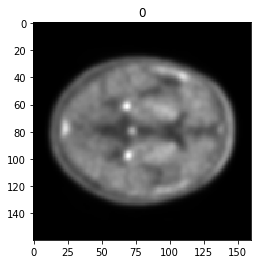

[0,    60] loss: 0.47142
[0,   120] loss: 0.37924
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 84.62 %
Val loss: 0.363017
[1,    60] loss: 0.38226
[1,   120] loss: 0.32357
Time elapsed: 0h:0m:11s
train accuracy_score: 86.63 %
val accuracy_score: 87.69 %
Val loss: 0.333096
[2,    60] loss: 0.26507
[2,   120] loss: 0.32999
Time elapsed: 0h:0m:16s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.321322
[3,    60] loss: 0.37128
[3,   120] loss: 0.30129
Time elapsed: 0h:0m:22s
train accuracy_score: 88.72 %
val accuracy_score: 87.69 %
Val loss: 0.316910
[4,    60] loss: 0.30711
[4,   120] loss: 0.30782
Time elapsed: 0h:0m:28s
train accuracy_score: 88.37 %
val accuracy_score: 89.23 %
Val loss: 0.309131
[5,    60] loss: 0.22686
[5,   120] loss: 0.26163
Time elapsed: 0h:0m:34s
train accuracy_score: 89.93 %
val accuracy_score: 90.77 %
Val loss: 0.303514
[6,    60] loss: 0.19915
[6,   120] loss: 0.26980
Time elapsed: 0h:0m:39s
train accuracy_score:

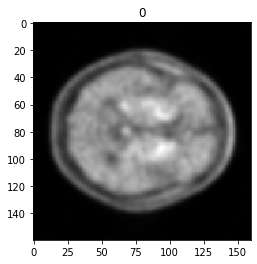

[0,    60] loss: 0.52790
[0,   120] loss: 0.38481
Time elapsed: 0h:0m:5s
train accuracy_score: 84.55 %
val accuracy_score: 86.15 %
Val loss: 0.364851
[1,    60] loss: 0.33390
[1,   120] loss: 0.40047
Time elapsed: 0h:0m:10s
train accuracy_score: 87.50 %
val accuracy_score: 90.77 %
Val loss: 0.332452
[2,    60] loss: 0.38194
[2,   120] loss: 0.30310
Time elapsed: 0h:0m:16s
train accuracy_score: 89.24 %
val accuracy_score: 90.77 %
Val loss: 0.310705
[3,    60] loss: 0.32801
[3,   120] loss: 0.26748
Time elapsed: 0h:0m:22s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.299969
[4,    60] loss: 0.24038
[4,   120] loss: 0.28152
Time elapsed: 0h:0m:27s
train accuracy_score: 90.10 %
val accuracy_score: 83.08 %
Val loss: 0.341398
[5,    60] loss: 0.30390
[5,   120] loss: 0.27880
Time elapsed: 0h:0m:33s
train accuracy_score: 90.45 %
val accuracy_score: 89.23 %
Val loss: 0.294377
[6,    60] loss: 0.23386
[6,   120] loss: 0.28900
Time elapsed: 0h:0m:39s
train accuracy_score:

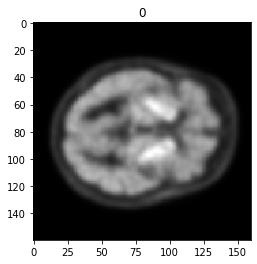

[0,    60] loss: 0.44434
[0,   120] loss: 0.40816
Time elapsed: 0h:0m:5s
train accuracy_score: 84.72 %
val accuracy_score: 86.15 %
Val loss: 0.374823
[1,    60] loss: 0.39073
[1,   120] loss: 0.35899
Time elapsed: 0h:0m:12s
train accuracy_score: 87.50 %
val accuracy_score: 89.23 %
Val loss: 0.349373
[2,    60] loss: 0.30940
[2,   120] loss: 0.37169
Time elapsed: 0h:0m:17s
train accuracy_score: 88.72 %
val accuracy_score: 89.23 %
Val loss: 0.336045
[3,    60] loss: 0.29993
[3,   120] loss: 0.33068
Time elapsed: 0h:0m:24s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.313778
[4,    60] loss: 0.32965
[4,   120] loss: 0.28545
Time elapsed: 0h:0m:29s
train accuracy_score: 88.72 %
val accuracy_score: 84.62 %
Val loss: 0.341618
[5,    60] loss: 0.30216
[5,   120] loss: 0.25795
Time elapsed: 0h:0m:35s
train accuracy_score: 90.62 %
val accuracy_score: 89.23 %
Val loss: 0.301601
[6,    60] loss: 0.30542
[6,   120] loss: 0.25613
Time elapsed: 0h:0m:41s
train accuracy_score:

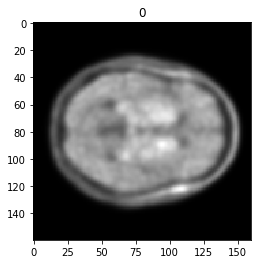

[0,    60] loss: 0.42276
[0,   120] loss: 0.50163
Time elapsed: 0h:0m:5s
train accuracy_score: 84.72 %
val accuracy_score: 87.69 %
Val loss: 0.342008
[1,    60] loss: 0.39271
[1,   120] loss: 0.34770
Time elapsed: 0h:0m:11s
train accuracy_score: 86.63 %
val accuracy_score: 89.23 %
Val loss: 0.296728
[2,    60] loss: 0.34010
[2,   120] loss: 0.31039
Time elapsed: 0h:0m:17s
train accuracy_score: 88.19 %
val accuracy_score: 89.23 %
Val loss: 0.277290
[3,    60] loss: 0.25772
[3,   120] loss: 0.27588
Time elapsed: 0h:0m:23s
train accuracy_score: 89.58 %
val accuracy_score: 89.23 %
Val loss: 0.293513
[4,    60] loss: 0.30961
[4,   120] loss: 0.25950
Time elapsed: 0h:0m:29s
train accuracy_score: 89.58 %
val accuracy_score: 90.77 %
Val loss: 0.289815
[5,    60] loss: 0.25902
[5,   120] loss: 0.26433
Time elapsed: 0h:0m:34s
train accuracy_score: 89.76 %
val accuracy_score: 90.77 %
Val loss: 0.279165
[6,    60] loss: 0.30900
[6,   120] loss: 0.23038
Time elapsed: 0h:0m:40s
train accuracy_score:

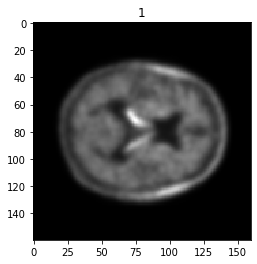

[0,    60] loss: 0.50491
[0,   120] loss: 0.42311
Time elapsed: 0h:0m:5s
train accuracy_score: 82.47 %
val accuracy_score: 84.62 %
Val loss: 0.376557
[1,    60] loss: 0.45679
[1,   120] loss: 0.30378
Time elapsed: 0h:0m:10s
train accuracy_score: 84.90 %
val accuracy_score: 89.23 %
Val loss: 0.350226
[2,    60] loss: 0.36150
[2,   120] loss: 0.32018
Time elapsed: 0h:0m:16s
train accuracy_score: 87.50 %
val accuracy_score: 89.23 %
Val loss: 0.347836
[3,    60] loss: 0.29004
[3,   120] loss: 0.32953
Time elapsed: 0h:0m:22s
train accuracy_score: 87.67 %
val accuracy_score: 89.23 %
Val loss: 0.344623
[4,    60] loss: 0.27919
[4,   120] loss: 0.31004
Time elapsed: 0h:0m:28s
train accuracy_score: 88.89 %
val accuracy_score: 90.77 %
Val loss: 0.327504
[5,    60] loss: 0.25191
[5,   120] loss: 0.32811
Time elapsed: 0h:0m:34s
train accuracy_score: 89.93 %
val accuracy_score: 90.77 %
Val loss: 0.318273
[6,    60] loss: 0.26439
[6,   120] loss: 0.30089
Time elapsed: 0h:0m:40s
train accuracy_score:

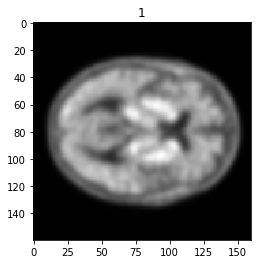

[0,    60] loss: 0.46824
[0,   120] loss: 0.42729
Time elapsed: 0h:0m:5s
train accuracy_score: 83.85 %
val accuracy_score: 84.62 %
Val loss: 0.364523
[1,    60] loss: 0.36238
[1,   120] loss: 0.39790
Time elapsed: 0h:0m:11s
train accuracy_score: 85.76 %
val accuracy_score: 89.23 %
Val loss: 0.315505
[2,    60] loss: 0.36465
[2,   120] loss: 0.26152
Time elapsed: 0h:0m:17s
train accuracy_score: 87.33 %
val accuracy_score: 89.23 %
Val loss: 0.309251
[3,    60] loss: 0.35645
[3,   120] loss: 0.27150
Time elapsed: 0h:0m:23s
train accuracy_score: 87.67 %
val accuracy_score: 89.23 %
Val loss: 0.308856
[4,    60] loss: 0.31518
[4,   120] loss: 0.34175
Time elapsed: 0h:0m:29s
train accuracy_score: 88.19 %
val accuracy_score: 90.77 %
Val loss: 0.309909
[5,    60] loss: 0.22485
[5,   120] loss: 0.29575
Time elapsed: 0h:0m:35s
train accuracy_score: 88.54 %
val accuracy_score: 86.15 %
Val loss: 0.344294
[6,    60] loss: 0.22409
[6,   120] loss: 0.30102
Time elapsed: 0h:0m:41s
train accuracy_score:

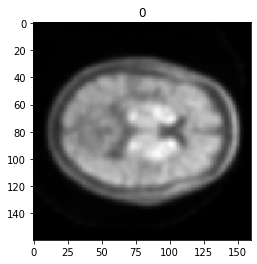

[0,    60] loss: 0.39083
[0,   120] loss: 0.46143
Time elapsed: 0h:0m:5s
train accuracy_score: 82.99 %
val accuracy_score: 84.62 %
Val loss: 0.367919
[1,    60] loss: 0.36917
[1,   120] loss: 0.38610
Time elapsed: 0h:0m:11s
train accuracy_score: 86.46 %
val accuracy_score: 89.23 %
Val loss: 0.342659
[2,    60] loss: 0.37609
[2,   120] loss: 0.26770
Time elapsed: 0h:0m:17s
train accuracy_score: 86.98 %
val accuracy_score: 89.23 %
Val loss: 0.317499
[3,    60] loss: 0.30546
[3,   120] loss: 0.30829
Time elapsed: 0h:0m:22s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.316608
[4,    60] loss: 0.28536
[4,   120] loss: 0.32227
Time elapsed: 0h:0m:29s
train accuracy_score: 88.89 %
val accuracy_score: 90.77 %
Val loss: 0.298218
[5,    60] loss: 0.26377
[5,   120] loss: 0.26156
Time elapsed: 0h:0m:35s
train accuracy_score: 89.41 %
val accuracy_score: 86.15 %
Val loss: 0.330646
[6,    60] loss: 0.29944
[6,   120] loss: 0.23840
Time elapsed: 0h:0m:40s
train accuracy_score:

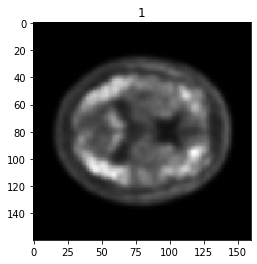

[0,    60] loss: 0.44042
[0,   120] loss: 0.42259
Time elapsed: 0h:0m:6s
train accuracy_score: 84.72 %
val accuracy_score: 84.62 %
Val loss: 0.371432
[1,    60] loss: 0.35263
[1,   120] loss: 0.32770
Time elapsed: 0h:0m:12s
train accuracy_score: 87.15 %
val accuracy_score: 89.23 %
Val loss: 0.336046
[2,    60] loss: 0.28497
[2,   120] loss: 0.40070
Time elapsed: 0h:0m:18s
train accuracy_score: 88.37 %
val accuracy_score: 90.77 %
Val loss: 0.310289
[3,    60] loss: 0.32167
[3,   120] loss: 0.25220
Time elapsed: 0h:0m:24s
train accuracy_score: 89.58 %
val accuracy_score: 87.69 %
Val loss: 0.311304
[4,    60] loss: 0.31090
[4,   120] loss: 0.26357
Time elapsed: 0h:0m:30s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.283868
[5,    60] loss: 0.22612
[5,   120] loss: 0.29293
Time elapsed: 0h:0m:36s
train accuracy_score: 90.45 %
val accuracy_score: 89.23 %
Val loss: 0.287030
[6,    60] loss: 0.31771
[6,   120] loss: 0.28989
Time elapsed: 0h:0m:42s
train accuracy_score:

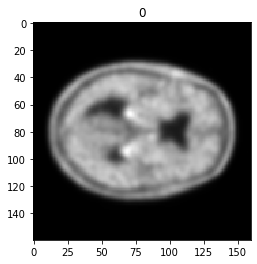

[0,    60] loss: 0.46662
[0,   120] loss: 0.41887
Time elapsed: 0h:0m:5s
train accuracy_score: 82.99 %
val accuracy_score: 84.62 %
Val loss: 0.365568
[1,    60] loss: 0.35077
[1,   120] loss: 0.34490
Time elapsed: 0h:0m:11s
train accuracy_score: 87.33 %
val accuracy_score: 89.23 %
Val loss: 0.331865
[2,    60] loss: 0.34109
[2,   120] loss: 0.30022
Time elapsed: 0h:0m:17s
train accuracy_score: 86.98 %
val accuracy_score: 90.77 %
Val loss: 0.318117
[3,    60] loss: 0.24644
[3,   120] loss: 0.33989
Time elapsed: 0h:0m:22s
train accuracy_score: 88.02 %
val accuracy_score: 87.69 %
Val loss: 0.297395
[4,    60] loss: 0.27396
[4,   120] loss: 0.29890
Time elapsed: 0h:0m:28s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.289210
[5,    60] loss: 0.27058
[5,   120] loss: 0.29638
Time elapsed: 0h:0m:34s
train accuracy_score: 89.58 %
val accuracy_score: 90.77 %
Val loss: 0.280544
[6,    60] loss: 0.29148
[6,   120] loss: 0.21435
Time elapsed: 0h:0m:40s
train accuracy_score:

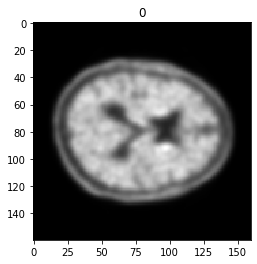

[0,    60] loss: 0.45881
[0,   120] loss: 0.36546
Time elapsed: 0h:0m:5s
train accuracy_score: 84.55 %
val accuracy_score: 89.23 %
Val loss: 0.355738
[1,    60] loss: 0.29905
[1,   120] loss: 0.32257
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.309873
[2,    60] loss: 0.27900
[2,   120] loss: 0.35401
Time elapsed: 0h:0m:16s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.288795
[3,    60] loss: 0.25783
[3,   120] loss: 0.32192
Time elapsed: 0h:0m:22s
train accuracy_score: 89.76 %
val accuracy_score: 89.23 %
Val loss: 0.288022
[4,    60] loss: 0.28803
[4,   120] loss: 0.28916
Time elapsed: 0h:0m:28s
train accuracy_score: 88.19 %
val accuracy_score: 89.23 %
Val loss: 0.287987
[5,    60] loss: 0.23228
[5,   120] loss: 0.29370
Time elapsed: 0h:0m:33s
train accuracy_score: 89.06 %
val accuracy_score: 86.15 %
Val loss: 0.320169
[6,    60] loss: 0.25398
[6,   120] loss: 0.29784
Time elapsed: 0h:0m:39s
train accuracy_score:

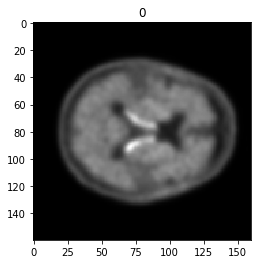

[0,    60] loss: 0.44627
[0,   120] loss: 0.38077
Time elapsed: 0h:0m:5s
train accuracy_score: 82.64 %
val accuracy_score: 87.69 %
Val loss: 0.336424
[1,    60] loss: 0.37840
[1,   120] loss: 0.33764
Time elapsed: 0h:0m:10s
train accuracy_score: 86.81 %
val accuracy_score: 86.15 %
Val loss: 0.334891
[2,    60] loss: 0.27440
[2,   120] loss: 0.38257
Time elapsed: 0h:0m:16s
train accuracy_score: 87.85 %
val accuracy_score: 89.23 %
Val loss: 0.308792
[3,    60] loss: 0.30104
[3,   120] loss: 0.30264
Time elapsed: 0h:0m:21s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.309746
[4,    60] loss: 0.26573
[4,   120] loss: 0.31311
Time elapsed: 0h:0m:27s
train accuracy_score: 89.06 %
val accuracy_score: 90.77 %
Val loss: 0.293398
[5,    60] loss: 0.29931
[5,   120] loss: 0.19770
Time elapsed: 0h:0m:34s
train accuracy_score: 90.62 %
val accuracy_score: 92.31 %
Val loss: 0.302626
[6,    60] loss: 0.26343
[6,   120] loss: 0.19757
Time elapsed: 0h:0m:40s
train accuracy_score:

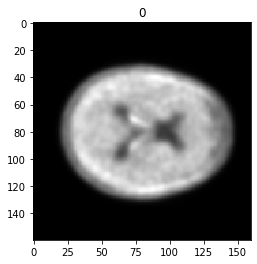

[0,    60] loss: 0.47873
[0,   120] loss: 0.40103
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 86.15 %
Val loss: 0.346742
[1,    60] loss: 0.37706
[1,   120] loss: 0.35513
Time elapsed: 0h:0m:11s
train accuracy_score: 87.50 %
val accuracy_score: 89.23 %
Val loss: 0.326817
[2,    60] loss: 0.30393
[2,   120] loss: 0.34036
Time elapsed: 0h:0m:17s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.296515
[3,    60] loss: 0.32302
[3,   120] loss: 0.26091
Time elapsed: 0h:0m:23s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.293500
[4,    60] loss: 0.29767
[4,   120] loss: 0.24210
Time elapsed: 0h:0m:28s
train accuracy_score: 88.89 %
val accuracy_score: 90.77 %
Val loss: 0.275788
[5,    60] loss: 0.32180
[5,   120] loss: 0.24924
Time elapsed: 0h:0m:34s
train accuracy_score: 90.80 %
val accuracy_score: 90.77 %
Val loss: 0.279991
[6,    60] loss: 0.25700
[6,   120] loss: 0.30436
Time elapsed: 0h:0m:40s
train accuracy_score:

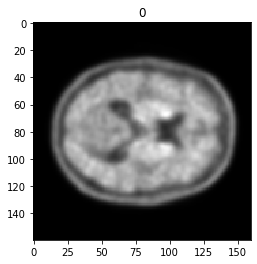

[0,    60] loss: 0.41594
[0,   120] loss: 0.46539
Time elapsed: 0h:0m:5s
train accuracy_score: 82.64 %
val accuracy_score: 84.62 %
Val loss: 0.358679
[1,    60] loss: 0.38445
[1,   120] loss: 0.33335
Time elapsed: 0h:0m:11s
train accuracy_score: 85.94 %
val accuracy_score: 90.77 %
Val loss: 0.316373
[2,    60] loss: 0.35557
[2,   120] loss: 0.29491
Time elapsed: 0h:0m:16s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.335727
[3,    60] loss: 0.28175
[3,   120] loss: 0.34267
Time elapsed: 0h:0m:23s
train accuracy_score: 88.37 %
val accuracy_score: 90.77 %
Val loss: 0.315978
[4,    60] loss: 0.22813
[4,   120] loss: 0.32378
Time elapsed: 0h:0m:29s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.329826
[5,    60] loss: 0.30023
[5,   120] loss: 0.27391
Time elapsed: 0h:0m:34s
train accuracy_score: 88.54 %
val accuracy_score: 90.77 %
Val loss: 0.309874
[6,    60] loss: 0.26275
[6,   120] loss: 0.21557
Time elapsed: 0h:0m:40s
train accuracy_score:

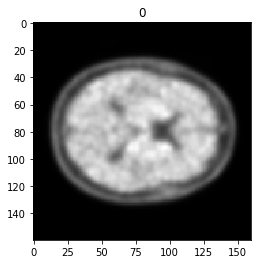

[0,    60] loss: 0.50154
[0,   120] loss: 0.43957
Time elapsed: 0h:0m:5s
train accuracy_score: 83.16 %
val accuracy_score: 87.69 %
Val loss: 0.342887
[1,    60] loss: 0.39647
[1,   120] loss: 0.24336
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.316106
[2,    60] loss: 0.30862
[2,   120] loss: 0.35017
Time elapsed: 0h:0m:17s
train accuracy_score: 88.54 %
val accuracy_score: 90.77 %
Val loss: 0.293437
[3,    60] loss: 0.24017
[3,   120] loss: 0.34397
Time elapsed: 0h:0m:23s
train accuracy_score: 89.58 %
val accuracy_score: 90.77 %
Val loss: 0.291052
[4,    60] loss: 0.30684
[4,   120] loss: 0.26210
Time elapsed: 0h:0m:29s
train accuracy_score: 89.58 %
val accuracy_score: 90.77 %
Val loss: 0.284567
[5,    60] loss: 0.28706
[5,   120] loss: 0.26595
Time elapsed: 0h:0m:34s
train accuracy_score: 90.45 %
val accuracy_score: 89.23 %
Val loss: 0.282484
[6,    60] loss: 0.27660
[6,   120] loss: 0.30822
Time elapsed: 0h:0m:41s
train accuracy_score:

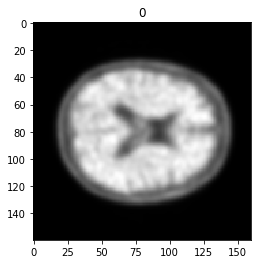

[0,    60] loss: 0.50857
[0,   120] loss: 0.39561
Time elapsed: 0h:0m:5s
train accuracy_score: 82.29 %
val accuracy_score: 87.69 %
Val loss: 0.328556
[1,    60] loss: 0.37506
[1,   120] loss: 0.32425
Time elapsed: 0h:0m:11s
train accuracy_score: 86.28 %
val accuracy_score: 87.69 %
Val loss: 0.295872
[2,    60] loss: 0.31861
[2,   120] loss: 0.33906
Time elapsed: 0h:0m:17s
train accuracy_score: 88.19 %
val accuracy_score: 89.23 %
Val loss: 0.297473
[3,    60] loss: 0.26820
[3,   120] loss: 0.28122
Time elapsed: 0h:0m:23s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.290309
[4,    60] loss: 0.29146
[4,   120] loss: 0.31961
Time elapsed: 0h:0m:28s
train accuracy_score: 90.10 %
val accuracy_score: 89.23 %
Val loss: 0.284697
[5,    60] loss: 0.27840
[5,   120] loss: 0.28720
Time elapsed: 0h:0m:34s
train accuracy_score: 90.28 %
val accuracy_score: 90.77 %
Val loss: 0.289555
[6,    60] loss: 0.26579
[6,   120] loss: 0.22764
Time elapsed: 0h:0m:39s
train accuracy_score:

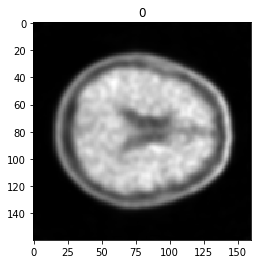

[0,    60] loss: 0.44204
[0,   120] loss: 0.36560
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 90.77 %
Val loss: 0.290477
[1,    60] loss: 0.41318
[1,   120] loss: 0.29463
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.290777
[2,    60] loss: 0.31535
[2,   120] loss: 0.31761
Time elapsed: 0h:0m:17s
train accuracy_score: 89.24 %
val accuracy_score: 89.23 %
Val loss: 0.295672
[3,    60] loss: 0.24458
[3,   120] loss: 0.28815
Time elapsed: 0h:0m:23s
train accuracy_score: 89.06 %
val accuracy_score: 84.62 %
Val loss: 0.303845
[4,    60] loss: 0.28866
[4,   120] loss: 0.30568
Time elapsed: 0h:0m:28s
train accuracy_score: 89.76 %
val accuracy_score: 89.23 %
Val loss: 0.280965
[5,    60] loss: 0.26300
[5,   120] loss: 0.29000
Time elapsed: 0h:0m:34s
train accuracy_score: 89.58 %
val accuracy_score: 84.62 %
Val loss: 0.325949
[6,    60] loss: 0.23505
[6,   120] loss: 0.25554
Time elapsed: 0h:0m:40s
train accuracy_score:

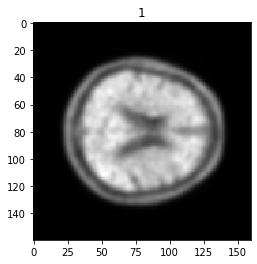

[0,    60] loss: 0.44069
[0,   120] loss: 0.39142
Time elapsed: 0h:0m:6s
train accuracy_score: 82.81 %
val accuracy_score: 89.23 %
Val loss: 0.299594
[1,    60] loss: 0.32566
[1,   120] loss: 0.32962
Time elapsed: 0h:0m:12s
train accuracy_score: 89.06 %
val accuracy_score: 90.77 %
Val loss: 0.294566
[2,    60] loss: 0.29872
[2,   120] loss: 0.31434
Time elapsed: 0h:0m:18s
train accuracy_score: 88.89 %
val accuracy_score: 84.62 %
Val loss: 0.332619
[3,    60] loss: 0.30340
[3,   120] loss: 0.26150
Time elapsed: 0h:0m:23s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.315130
[4,    60] loss: 0.30614
[4,   120] loss: 0.28507
Time elapsed: 0h:0m:29s
train accuracy_score: 90.10 %
val accuracy_score: 89.23 %
Val loss: 0.310579
[5,    60] loss: 0.27884
[5,   120] loss: 0.30523
Time elapsed: 0h:0m:34s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.299934
[6,    60] loss: 0.23433
[6,   120] loss: 0.34222
Time elapsed: 0h:0m:41s
train accuracy_score:

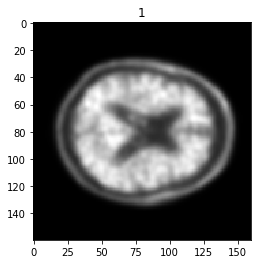

[0,    60] loss: 0.48735
[0,   120] loss: 0.34170
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 87.69 %
Val loss: 0.301923
[1,    60] loss: 0.37466
[1,   120] loss: 0.30910
Time elapsed: 0h:0m:11s
train accuracy_score: 88.02 %
val accuracy_score: 86.15 %
Val loss: 0.298695
[2,    60] loss: 0.38126
[2,   120] loss: 0.30492
Time elapsed: 0h:0m:16s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.294125
[3,    60] loss: 0.28990
[3,   120] loss: 0.34471
Time elapsed: 0h:0m:22s
train accuracy_score: 88.89 %
val accuracy_score: 87.69 %
Val loss: 0.291973
[4,    60] loss: 0.33346
[4,   120] loss: 0.29478
Time elapsed: 0h:0m:28s
train accuracy_score: 88.19 %
val accuracy_score: 89.23 %
Val loss: 0.300203
[5,    60] loss: 0.30492
[5,   120] loss: 0.26901
Time elapsed: 0h:0m:34s
train accuracy_score: 89.06 %
val accuracy_score: 89.23 %
Val loss: 0.294351
[6,    60] loss: 0.26331
[6,   120] loss: 0.26695
Time elapsed: 0h:0m:40s
train accuracy_score:

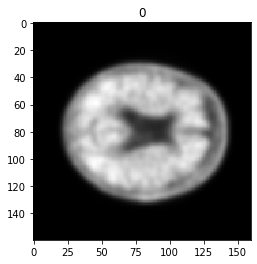

[0,    60] loss: 0.47928
[0,   120] loss: 0.30730
Time elapsed: 0h:0m:5s
train accuracy_score: 85.07 %
val accuracy_score: 87.69 %
Val loss: 0.306231
[1,    60] loss: 0.26493
[1,   120] loss: 0.39536
Time elapsed: 0h:0m:11s
train accuracy_score: 88.54 %
val accuracy_score: 89.23 %
Val loss: 0.300309
[2,    60] loss: 0.35396
[2,   120] loss: 0.28427
Time elapsed: 0h:0m:17s
train accuracy_score: 87.67 %
val accuracy_score: 86.15 %
Val loss: 0.310031
[3,    60] loss: 0.28604
[3,   120] loss: 0.26051
Time elapsed: 0h:0m:23s
train accuracy_score: 88.02 %
val accuracy_score: 87.69 %
Val loss: 0.311089
[4,    60] loss: 0.30748
[4,   120] loss: 0.21620
Time elapsed: 0h:0m:29s
train accuracy_score: 88.89 %
val accuracy_score: 87.69 %
Val loss: 0.319205
[5,    60] loss: 0.27781
[5,   120] loss: 0.24707
Time elapsed: 0h:0m:35s
train accuracy_score: 89.58 %
val accuracy_score: 87.69 %
Val loss: 0.330856
[6,    60] loss: 0.27390
[6,   120] loss: 0.23970
Time elapsed: 0h:0m:41s
train accuracy_score:

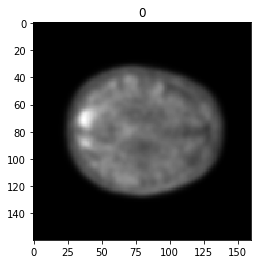

[0,    60] loss: 0.50608
[0,   120] loss: 0.39005
Time elapsed: 0h:0m:5s
train accuracy_score: 82.64 %
val accuracy_score: 84.62 %
Val loss: 0.316452
[1,    60] loss: 0.34814
[1,   120] loss: 0.38048
Time elapsed: 0h:0m:11s
train accuracy_score: 87.33 %
val accuracy_score: 89.23 %
Val loss: 0.286895
[2,    60] loss: 0.28425
[2,   120] loss: 0.37260
Time elapsed: 0h:0m:17s
train accuracy_score: 87.67 %
val accuracy_score: 89.23 %
Val loss: 0.281905
[3,    60] loss: 0.32631
[3,   120] loss: 0.31131
Time elapsed: 0h:0m:23s
train accuracy_score: 88.54 %
val accuracy_score: 87.69 %
Val loss: 0.286051
[4,    60] loss: 0.27673
[4,   120] loss: 0.25301
Time elapsed: 0h:0m:29s
train accuracy_score: 89.58 %
val accuracy_score: 89.23 %
Val loss: 0.302023
[5,    60] loss: 0.30497
[5,   120] loss: 0.30350
Time elapsed: 0h:0m:35s
train accuracy_score: 88.37 %
val accuracy_score: 87.69 %
Val loss: 0.282145
[6,    60] loss: 0.24010
[6,   120] loss: 0.22154
Time elapsed: 0h:0m:41s
train accuracy_score:

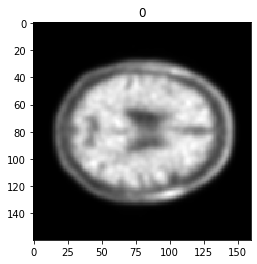

[0,    60] loss: 0.39398
[0,   120] loss: 0.36107
Time elapsed: 0h:0m:5s
train accuracy_score: 84.38 %
val accuracy_score: 87.69 %
Val loss: 0.316313
[1,    60] loss: 0.32155
[1,   120] loss: 0.33933
Time elapsed: 0h:0m:10s
train accuracy_score: 87.67 %
val accuracy_score: 87.69 %
Val loss: 0.285045
[2,    60] loss: 0.32558
[2,   120] loss: 0.32059
Time elapsed: 0h:0m:16s
train accuracy_score: 88.02 %
val accuracy_score: 87.69 %
Val loss: 0.286174
[3,    60] loss: 0.32893
[3,   120] loss: 0.28820
Time elapsed: 0h:0m:22s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.306622
[4,    60] loss: 0.28645
[4,   120] loss: 0.27320
Time elapsed: 0h:0m:27s
train accuracy_score: 89.93 %
val accuracy_score: 87.69 %
Val loss: 0.286024
[5,    60] loss: 0.24746
[5,   120] loss: 0.28067
Time elapsed: 0h:0m:33s
train accuracy_score: 91.32 %
val accuracy_score: 87.69 %
Val loss: 0.291587
[6,    60] loss: 0.27171
[6,   120] loss: 0.21463
Time elapsed: 0h:0m:38s
train accuracy_score:

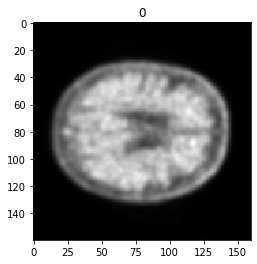

[0,    60] loss: 0.51861
[0,   120] loss: 0.34657
Time elapsed: 0h:0m:5s
train accuracy_score: 83.85 %
val accuracy_score: 86.15 %
Val loss: 0.293167
[1,    60] loss: 0.36899
[1,   120] loss: 0.34674
Time elapsed: 0h:0m:11s
train accuracy_score: 87.15 %
val accuracy_score: 89.23 %
Val loss: 0.294008
[2,    60] loss: 0.22848
[2,   120] loss: 0.39349
Time elapsed: 0h:0m:16s
train accuracy_score: 87.85 %
val accuracy_score: 87.69 %
Val loss: 0.289241
[3,    60] loss: 0.25230
[3,   120] loss: 0.31943
Time elapsed: 0h:0m:22s
train accuracy_score: 89.41 %
val accuracy_score: 87.69 %
Val loss: 0.313322
[4,    60] loss: 0.28328
[4,   120] loss: 0.24510
Time elapsed: 0h:0m:27s
train accuracy_score: 88.89 %
val accuracy_score: 86.15 %
Val loss: 0.320107
[5,    60] loss: 0.28305
[5,   120] loss: 0.26600
Time elapsed: 0h:0m:33s
train accuracy_score: 90.62 %
val accuracy_score: 89.23 %
Val loss: 0.308353
[6,    60] loss: 0.24627
[6,   120] loss: 0.32934
Time elapsed: 0h:0m:38s
train accuracy_score:

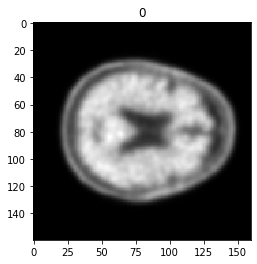

[0,    60] loss: 0.51473
[0,   120] loss: 0.39499
Time elapsed: 0h:0m:5s
train accuracy_score: 83.51 %
val accuracy_score: 84.62 %
Val loss: 0.332216
[1,    60] loss: 0.32489
[1,   120] loss: 0.38433
Time elapsed: 0h:0m:11s
train accuracy_score: 84.72 %
val accuracy_score: 87.69 %
Val loss: 0.287135
[2,    60] loss: 0.31692
[2,   120] loss: 0.29277
Time elapsed: 0h:0m:16s
train accuracy_score: 87.50 %
val accuracy_score: 87.69 %
Val loss: 0.308601
[3,    60] loss: 0.26770
[3,   120] loss: 0.33775
Time elapsed: 0h:0m:22s
train accuracy_score: 87.15 %
val accuracy_score: 87.69 %
Val loss: 0.299183
[4,    60] loss: 0.27548
[4,   120] loss: 0.27664
Time elapsed: 0h:0m:29s
train accuracy_score: 89.24 %
val accuracy_score: 87.69 %
Val loss: 0.287463
[5,    60] loss: 0.27565
[5,   120] loss: 0.25709
Time elapsed: 0h:0m:35s
train accuracy_score: 90.28 %
val accuracy_score: 87.69 %
Val loss: 0.284777
[6,    60] loss: 0.29698
[6,   120] loss: 0.26047
Time elapsed: 0h:0m:41s
train accuracy_score:

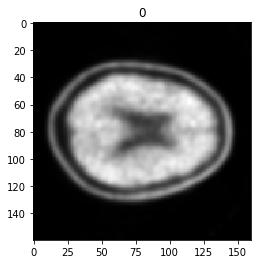

[0,    60] loss: 0.47166
[0,   120] loss: 0.34705
Time elapsed: 0h:0m:6s
train accuracy_score: 83.68 %
val accuracy_score: 87.69 %
Val loss: 0.303208
[1,    60] loss: 0.32030
[1,   120] loss: 0.35150
Time elapsed: 0h:0m:12s
train accuracy_score: 87.33 %
val accuracy_score: 87.69 %
Val loss: 0.293755
[2,    60] loss: 0.28107
[2,   120] loss: 0.38326
Time elapsed: 0h:0m:18s
train accuracy_score: 88.37 %
val accuracy_score: 89.23 %
Val loss: 0.288581
[3,    60] loss: 0.27858
[3,   120] loss: 0.35821
Time elapsed: 0h:0m:24s
train accuracy_score: 88.72 %
val accuracy_score: 90.77 %
Val loss: 0.285879
[4,    60] loss: 0.43108
[4,   120] loss: 0.20906
Time elapsed: 0h:0m:30s
train accuracy_score: 88.72 %
val accuracy_score: 87.69 %
Val loss: 0.284557
[5,    60] loss: 0.26568
[5,   120] loss: 0.28732
Time elapsed: 0h:0m:36s
train accuracy_score: 89.41 %
val accuracy_score: 89.23 %
Val loss: 0.281083
[6,    60] loss: 0.28992
[6,   120] loss: 0.25576
Time elapsed: 0h:0m:42s
train accuracy_score:

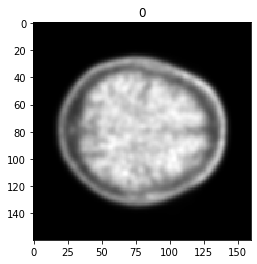

[0,    60] loss: 0.43044
[0,   120] loss: 0.33377
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 87.69 %
Val loss: 0.299965
[1,    60] loss: 0.27027
[1,   120] loss: 0.36911
Time elapsed: 0h:0m:12s
train accuracy_score: 87.85 %
val accuracy_score: 84.62 %
Val loss: 0.298649
[2,    60] loss: 0.32499
[2,   120] loss: 0.26350
Time elapsed: 0h:0m:19s
train accuracy_score: 88.72 %
val accuracy_score: 84.62 %
Val loss: 0.291491
[3,    60] loss: 0.28403
[3,   120] loss: 0.32765
Time elapsed: 0h:0m:25s
train accuracy_score: 89.58 %
val accuracy_score: 84.62 %
Val loss: 0.282676
[4,    60] loss: 0.22593
[4,   120] loss: 0.30284
Time elapsed: 0h:0m:31s
train accuracy_score: 89.76 %
val accuracy_score: 87.69 %
Val loss: 0.277820
[5,    60] loss: 0.29841
[5,   120] loss: 0.21547
Time elapsed: 0h:0m:37s
train accuracy_score: 88.54 %
val accuracy_score: 86.15 %
Val loss: 0.320999
[6,    60] loss: 0.29076
[6,   120] loss: 0.25077
Time elapsed: 0h:0m:43s
train accuracy_score:

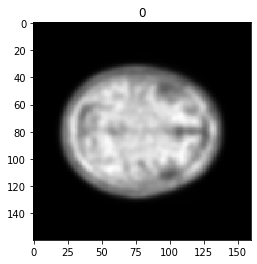

[0,    60] loss: 0.46686
[0,   120] loss: 0.36634
Time elapsed: 0h:0m:5s
train accuracy_score: 83.85 %
val accuracy_score: 84.62 %
Val loss: 0.313710
[1,    60] loss: 0.33179
[1,   120] loss: 0.27848
Time elapsed: 0h:0m:11s
train accuracy_score: 87.15 %
val accuracy_score: 84.62 %
Val loss: 0.336966
[2,    60] loss: 0.31677
[2,   120] loss: 0.32839
Time elapsed: 0h:0m:17s
train accuracy_score: 89.06 %
val accuracy_score: 84.62 %
Val loss: 0.311583
[3,    60] loss: 0.27974
[3,   120] loss: 0.29852
Time elapsed: 0h:0m:23s
train accuracy_score: 89.41 %
val accuracy_score: 84.62 %
Val loss: 0.315144
[4,    60] loss: 0.27476
[4,   120] loss: 0.25678
Time elapsed: 0h:0m:30s
train accuracy_score: 88.72 %
val accuracy_score: 83.08 %
Val loss: 0.333193
[5,    60] loss: 0.25290
[5,   120] loss: 0.23481
Time elapsed: 0h:0m:36s
train accuracy_score: 90.80 %
val accuracy_score: 84.62 %
Val loss: 0.317993
[6,    60] loss: 0.27524
[6,   120] loss: 0.26173
Time elapsed: 0h:0m:42s
train accuracy_score:

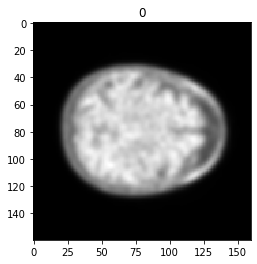

[0,    60] loss: 0.43076
[0,   120] loss: 0.36179
Time elapsed: 0h:0m:5s
train accuracy_score: 84.20 %
val accuracy_score: 86.15 %
Val loss: 0.327011
[1,    60] loss: 0.40076
[1,   120] loss: 0.27033
Time elapsed: 0h:0m:11s
train accuracy_score: 86.28 %
val accuracy_score: 84.62 %
Val loss: 0.300495
[2,    60] loss: 0.34999
[2,   120] loss: 0.28535
Time elapsed: 0h:0m:18s
train accuracy_score: 88.02 %
val accuracy_score: 84.62 %
Val loss: 0.299676
[3,    60] loss: 0.29651
[3,   120] loss: 0.29309
Time elapsed: 0h:0m:24s
train accuracy_score: 89.58 %
val accuracy_score: 84.62 %
Val loss: 0.296423
[4,    60] loss: 0.26782
[4,   120] loss: 0.27092
Time elapsed: 0h:0m:30s
train accuracy_score: 89.24 %
val accuracy_score: 84.62 %
Val loss: 0.295948
[5,    60] loss: 0.23735
[5,   120] loss: 0.28310
Time elapsed: 0h:0m:36s
train accuracy_score: 90.45 %
val accuracy_score: 84.62 %
Val loss: 0.309891
[6,    60] loss: 0.28273
[6,   120] loss: 0.22501
Time elapsed: 0h:0m:42s
train accuracy_score:

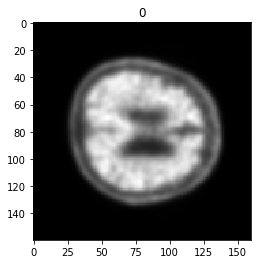

[0,    60] loss: 0.47850
[0,   120] loss: 0.43179
Time elapsed: 0h:0m:6s
train accuracy_score: 82.29 %
val accuracy_score: 84.62 %
Val loss: 0.320315
[1,    60] loss: 0.34827
[1,   120] loss: 0.37552
Time elapsed: 0h:0m:12s
train accuracy_score: 86.28 %
val accuracy_score: 87.69 %
Val loss: 0.286959
[2,    60] loss: 0.29572
[2,   120] loss: 0.31266
Time elapsed: 0h:0m:18s
train accuracy_score: 87.15 %
val accuracy_score: 86.15 %
Val loss: 0.286906
[3,    60] loss: 0.30406
[3,   120] loss: 0.28380
Time elapsed: 0h:0m:24s
train accuracy_score: 90.28 %
val accuracy_score: 86.15 %
Val loss: 0.297915
[4,    60] loss: 0.30346
[4,   120] loss: 0.25320
Time elapsed: 0h:0m:31s
train accuracy_score: 90.28 %
val accuracy_score: 86.15 %
Val loss: 0.319402
[5,    60] loss: 0.24605
[5,   120] loss: 0.23198
Time elapsed: 0h:0m:37s
train accuracy_score: 90.80 %
val accuracy_score: 84.62 %
Val loss: 0.312724
[6,    60] loss: 0.29508
[6,   120] loss: 0.26904
Time elapsed: 0h:0m:43s
train accuracy_score:

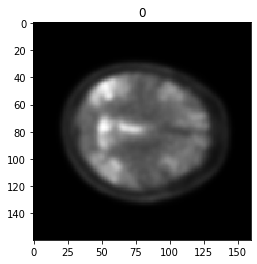

[0,    60] loss: 0.47222
[0,   120] loss: 0.34050
Time elapsed: 0h:0m:6s
train accuracy_score: 83.68 %
val accuracy_score: 90.77 %
Val loss: 0.327407
[1,    60] loss: 0.33452
[1,   120] loss: 0.31100
Time elapsed: 0h:0m:12s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.309158
[2,    60] loss: 0.30096
[2,   120] loss: 0.33622
Time elapsed: 0h:0m:18s
train accuracy_score: 87.85 %
val accuracy_score: 84.62 %
Val loss: 0.321643
[3,    60] loss: 0.24347
[3,   120] loss: 0.32008
Time elapsed: 0h:0m:24s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.300257
[4,    60] loss: 0.28384
[4,   120] loss: 0.27608
Time elapsed: 0h:0m:30s
train accuracy_score: 90.10 %
val accuracy_score: 84.62 %
Val loss: 0.324719
[5,    60] loss: 0.26061
[5,   120] loss: 0.25356
Time elapsed: 0h:0m:36s
train accuracy_score: 90.10 %
val accuracy_score: 87.69 %
Val loss: 0.292479
[6,    60] loss: 0.23721
[6,   120] loss: 0.26962
Time elapsed: 0h:0m:42s
train accuracy_score:

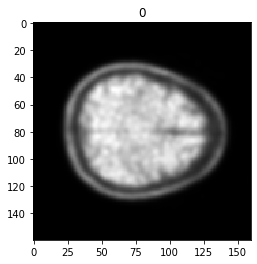

[0,    60] loss: 0.44663
[0,   120] loss: 0.44446
Time elapsed: 0h:0m:5s
train accuracy_score: 82.64 %
val accuracy_score: 86.15 %
Val loss: 0.334050
[1,    60] loss: 0.33197
[1,   120] loss: 0.33608
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.293877
[2,    60] loss: 0.28037
[2,   120] loss: 0.35785
Time elapsed: 0h:0m:17s
train accuracy_score: 87.33 %
val accuracy_score: 87.69 %
Val loss: 0.320591
[3,    60] loss: 0.27923
[3,   120] loss: 0.33529
Time elapsed: 0h:0m:23s
train accuracy_score: 88.02 %
val accuracy_score: 86.15 %
Val loss: 0.296657
[4,    60] loss: 0.31361
[4,   120] loss: 0.28439
Time elapsed: 0h:0m:28s
train accuracy_score: 89.58 %
val accuracy_score: 87.69 %
Val loss: 0.292465
[5,    60] loss: 0.26170
[5,   120] loss: 0.23920
Time elapsed: 0h:0m:34s
train accuracy_score: 89.41 %
val accuracy_score: 87.69 %
Val loss: 0.300591
[6,    60] loss: 0.25577
[6,   120] loss: 0.30390
Time elapsed: 0h:0m:40s
train accuracy_score:

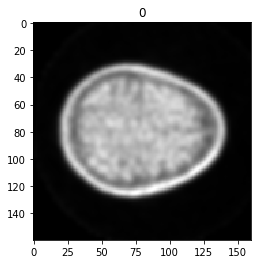

[0,    60] loss: 0.51290
[0,   120] loss: 0.31439
Time elapsed: 0h:0m:5s
train accuracy_score: 84.72 %
val accuracy_score: 84.62 %
Val loss: 0.353995
[1,    60] loss: 0.37664
[1,   120] loss: 0.33635
Time elapsed: 0h:0m:11s
train accuracy_score: 85.94 %
val accuracy_score: 89.23 %
Val loss: 0.321095
[2,    60] loss: 0.33930
[2,   120] loss: 0.33527
Time elapsed: 0h:0m:17s
train accuracy_score: 87.85 %
val accuracy_score: 89.23 %
Val loss: 0.320387
[3,    60] loss: 0.29756
[3,   120] loss: 0.30692
Time elapsed: 0h:0m:22s
train accuracy_score: 89.06 %
val accuracy_score: 87.69 %
Val loss: 0.315470
[4,    60] loss: 0.26954
[4,   120] loss: 0.24299
Time elapsed: 0h:0m:28s
train accuracy_score: 88.19 %
val accuracy_score: 86.15 %
Val loss: 0.336146
[5,    60] loss: 0.29861
[5,   120] loss: 0.27669
Time elapsed: 0h:0m:34s
train accuracy_score: 90.28 %
val accuracy_score: 89.23 %
Val loss: 0.332841
[6,    60] loss: 0.25802
[6,   120] loss: 0.25958
Time elapsed: 0h:0m:39s
train accuracy_score:

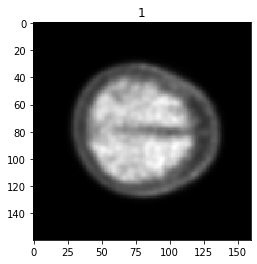

[0,    60] loss: 0.43061
[0,   120] loss: 0.36641
Time elapsed: 0h:0m:5s
train accuracy_score: 84.38 %
val accuracy_score: 84.62 %
Val loss: 0.332439
[1,    60] loss: 0.36554
[1,   120] loss: 0.35257
Time elapsed: 0h:0m:11s
train accuracy_score: 88.02 %
val accuracy_score: 87.69 %
Val loss: 0.316149
[2,    60] loss: 0.31141
[2,   120] loss: 0.33668
Time elapsed: 0h:0m:17s
train accuracy_score: 88.02 %
val accuracy_score: 86.15 %
Val loss: 0.319584
[3,    60] loss: 0.33332
[3,   120] loss: 0.31928
Time elapsed: 0h:0m:23s
train accuracy_score: 88.72 %
val accuracy_score: 86.15 %
Val loss: 0.327139
[4,    60] loss: 0.26945
[4,   120] loss: 0.29255
Time elapsed: 0h:0m:29s
train accuracy_score: 89.93 %
val accuracy_score: 89.23 %
Val loss: 0.342156
[5,    60] loss: 0.30588
[5,   120] loss: 0.28700
Time elapsed: 0h:0m:35s
train accuracy_score: 90.28 %
val accuracy_score: 86.15 %
Val loss: 0.325165
[6,    60] loss: 0.28013
[6,   120] loss: 0.25916
Time elapsed: 0h:0m:41s
train accuracy_score:

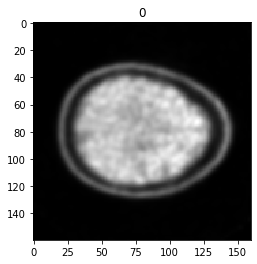

[0,    60] loss: 0.46542
[0,   120] loss: 0.39890
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 83.08 %
Val loss: 0.341294
[1,    60] loss: 0.39523
[1,   120] loss: 0.33599
Time elapsed: 0h:0m:11s
train accuracy_score: 85.24 %
val accuracy_score: 84.62 %
Val loss: 0.316583
[2,    60] loss: 0.34114
[2,   120] loss: 0.29507
Time elapsed: 0h:0m:17s
train accuracy_score: 87.33 %
val accuracy_score: 86.15 %
Val loss: 0.304856
[3,    60] loss: 0.26819
[3,   120] loss: 0.36050
Time elapsed: 0h:0m:22s
train accuracy_score: 89.06 %
val accuracy_score: 86.15 %
Val loss: 0.307703
[4,    60] loss: 0.27856
[4,   120] loss: 0.29655
Time elapsed: 0h:0m:28s
train accuracy_score: 90.62 %
val accuracy_score: 86.15 %
Val loss: 0.354376
[5,    60] loss: 0.30129
[5,   120] loss: 0.27603
Time elapsed: 0h:0m:34s
train accuracy_score: 88.37 %
val accuracy_score: 84.62 %
Val loss: 0.317477
[6,    60] loss: 0.26070
[6,   120] loss: 0.29123
Time elapsed: 0h:0m:40s
train accuracy_score:

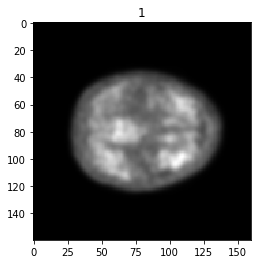

[0,    60] loss: 0.46128
[0,   120] loss: 0.43546
Time elapsed: 0h:0m:5s
train accuracy_score: 84.03 %
val accuracy_score: 83.08 %
Val loss: 0.319384
[1,    60] loss: 0.40819
[1,   120] loss: 0.32404
Time elapsed: 0h:0m:11s
train accuracy_score: 86.81 %
val accuracy_score: 87.69 %
Val loss: 0.315804
[2,    60] loss: 0.28849
[2,   120] loss: 0.31956
Time elapsed: 0h:0m:17s
train accuracy_score: 88.54 %
val accuracy_score: 86.15 %
Val loss: 0.302596
[3,    60] loss: 0.31140
[3,   120] loss: 0.33442
Time elapsed: 0h:0m:23s
train accuracy_score: 88.89 %
val accuracy_score: 87.69 %
Val loss: 0.305413
[4,    60] loss: 0.25239
[4,   120] loss: 0.35577
Time elapsed: 0h:0m:29s
train accuracy_score: 88.37 %
val accuracy_score: 87.69 %
Val loss: 0.297867
[5,    60] loss: 0.27710
[5,   120] loss: 0.29319
Time elapsed: 0h:0m:35s
train accuracy_score: 90.80 %
val accuracy_score: 86.15 %
Val loss: 0.315341
[6,    60] loss: 0.30295
[6,   120] loss: 0.25759
Time elapsed: 0h:0m:40s
train accuracy_score:

In [45]:
for z_slice in range(0, 10):
    print('Starting slice {}'.format(z_slice))
    # format data for pytorch
    if type(ims) != torch.Tensor: 
        ims = torch.from_numpy(ims).float()
    x = torch.moveaxis(ims[:,:,:,z_slice], -1, 1)

    # randomly create holdout set
    x_train, x_val, y_train, y_val = train_test_split(x, 
                                                    group, 
                                                    test_size = .1, 
                                                    shuffle = True, 
                                                    stratify = group, 
                                                    random_state = seed) 

    # min max normalization
    for i in range(len(x_train)):
        x_train[i] -= torch.min(x_train[i])
        x_train[i] /= torch.max(x_train[i])
    for i in range(len(x_val)):
        x_val[i] -= torch.min(x_val[i])
        x_val[i] /= torch.max(x_val[i])
    print(x_train.shape)
    print(x_val.shape)
    print(y_train.shape)
    print(y_val.shape)
    print(sum(y_train))
    print(sum(y_val))

    # https://github.com/moboehle/Pytorch-LRP/blob/master/ADNI%20Training.ipynb
    class ADNIDataset(Dataset):
        def __init__(self, X, y, transform=None, target_transform=None, mask=None, z_factor=None, dtype=torch.float32, num_classes=2):
            self.X = np.copy(X)
            self.y = np.copy(y)
            self.X = X
            self.y = y
            self.transform = transform
            self.target_transform = target_transform
            self.mask = mask
            self.z_factor = z_factor
            self.dtype = dtype
            self.num_classes = num_classes

        def __len__(self):
            return len(self.X)

        def __getitem__(self, idx):
            image = self.X[idx]
            label_tensor = np.zeros(shape=(self.num_classes,))
            label = self.y[idx] >= 0.5
            label = torch.LongTensor([label])

            if self.transform:
                image = self.transform(image)

            sample = {"image" : image,
                     "label" : label}
            return sample

    adni_data_train = ADNIDataset(x_train, y_train)
    adni_data_val = ADNIDataset(x_val, y_val)

    # https://github.com/moboehle/Pytorch-LRP/blob/master/ADNI%20Training.ipynb for reference
    class ClassificationModel2D(nn.Module):

        def __init__(self, dropout=0.4, dropout2=0.4):
            nn.Module.__init__(self)
            self.Conv_1 = nn.Conv2d(1, 8, 3)
            self.Conv_1_bn = nn.BatchNorm2d(8)
            self.Conv_1_mp = nn.MaxPool2d(2)
            self.Conv_2 = nn.Conv2d(8, 16, 3)
            self.Conv_2_bn = nn.BatchNorm2d(16)
            self.Conv_2_mp = nn.MaxPool2d(3)
            self.Conv_3 = nn.Conv2d(16, 32, 3)
            self.Conv_3_bn = nn.BatchNorm2d(32)
            self.Conv_3_mp = nn.MaxPool2d(2)
            self.Conv_4 = nn.Conv2d(32, 64, 3)
            self.Conv_4_bn = nn.BatchNorm2d(64)
            self.Conv_4_mp = nn.MaxPool2d(3)
            self.dense_1 = nn.Linear(576, 128)
            self.dense_2 = nn.Linear(128, 2)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)
            self.dropout2 = nn.Dropout(dropout2)

        def forward(self, x):
            x = self.relu(self.Conv_1_bn(self.Conv_1(x)))
            x = self.Conv_1_mp(x)
            x = self.relu(self.Conv_2_bn(self.Conv_2(x)))
            x = self.Conv_2_mp(x)
            x = self.relu(self.Conv_3_bn(self.Conv_3(x)))
            x = self.Conv_3_mp(x)
            x = self.relu(self.Conv_4_bn(self.Conv_4(x)))
            x = self.Conv_4_mp(x)
            x = x.view(x.size(0), -1)
            x = self.dropout(x)
            x = self.relu(self.dense_1(x))
            x = self.dropout2(x)
            x = self.dense_2(x)
            return x

    net = ClassificationModel2D()

    # https://github.com/moboehle/Pytorch-LRP/blob/master/ADNI%20Training.ipynb
    def run(
        net,
        data,
        shape,
        callbacks=[],
        augmentations=[],
        masked=False,
        metrics=[],
        k_folds=None,
        b=4,
        num_epochs=35,
        retain_metric=None):      

        fold_metric = []
        models = []
        fold = 0
        initial_prepend = None

        for trial in range(5):
            print("Starting trial {}".format(trial))

            # add current fold number to model checkpoint path
            if callbacks is not None:
                for idx, callback in enumerate(callbacks):
                    if isinstance(callback, ModelCheckpoint):
                        if initial_prepend is None:
                            initial_prepend = callbacks[idx].prepend
                        callbacks[idx].prepend = initial_prepend + "cv_fold_{}_".format(fold)
            fold += 1

            # restart model
            del net
            net = ClassificationModel2D()

            # reset hyperparameters
            lr = 1e-4
            wd = 1e-4
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=wd)

            train_loader = DataLoader(adni_data_train, batch_size=b, num_workers=0, shuffle=True)
            val_loader = DataLoader(adni_data_val, batch_size=1, num_workers=0, shuffle=True)

            # plot slice (optional)
            sample = next(iter(train_loader))
            img = sample["image"][0]
            lbl = sample["label"][0]
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(lbl.item())
            plt.show()
            model_trainer = trainer.Trainer(
                net,
                criterion,
                optimizer,
                metrics=metrics,
                callbacks=callbacks,
                device=torch.device("cpu"),
                prediction_type="classification")

            # train model and store results
            net, report = model_trainer.train_model(
                train_loader,
                val_loader,
                num_epochs=num_epochs,
                show_train_steps=60,
                show_validation_epochs=1)
            # append validation score of the retain metric
            if isinstance(retain_metric, str):
                fold_metric.append(report["val_metrics"][retain_metric][-1])
            else:
                fold_metric.append(report["val_metrics"][retain_metric.__name__][-1])

            models.append(net)
            print("Finished fold.")

            # visualize result (optional)
            #model_trainer.visualize_training(report, metrics)
            #model_trainer.evaluate_model(val_loader)

        print("################################")
        print("################################")
        print("All accuracies: {}".format(fold_metric))
        return fold_metric, models

    net = ClassificationModel2D()
    num_epochs = 25
    min_iters = 3
    ignore_epochs = 15
    normalize = False
    retain_metric = accuracy_score
    metrics = [accuracy_score]
    model_path = './trained_cn_ad_pet_2'
    r = 0

    check = ModelCheckpoint(path=model_path,
                            prepend="repeat_{}".format(r),
                            store_best=True,
                            ignore_before=ignore_epochs,
                            retain_metric=retain_metric)
    callbacks = [check, EarlyStopping(patience=10, ignore_before=ignore_epochs, retain_metric="loss", mode='min')]

    fold_metric, models = run(net=net, data=adni_data_train,
                      k_folds=-1,
                      callbacks=None,
                      shape=-1,
                      masked=False,
                      metrics=metrics,
                      num_epochs=num_epochs,
                      retain_metric=retain_metric,
                      b=4,
                     )

    print(np.mean(fold_metric))
    print(np.std(fold_metric))
    best = np.array(fold_metric).argmax()
    torch.save(models[best].state_dict(), model_path + '/' + '2D_Slice_' + str(30 + z_slice * 4))

# Load the holdout set

In [11]:
# locate the holdout images
dir = ('./PET_Data/PET_holdout/') # change this to directory with PET images     
files = os.listdir(dir)

# load conversion dataframe
df_holdout = pd.read_csv('../processed_data/holdout.csv')

# make sure there are no subjects in both training and holdout groups
for i in df['Subject']:
    if any(df_holdout['PTID'] == i):
        print('Failed')
        break

holdout = df_holdout[df_holdout['Modality'] == 'PET']

# load in holdout images and create labels
group = []
for i in range(len(files)):
    idx = files[i][5:15]
    group.append(holdout.loc[holdout.PTID==idx,'AD_conv'].values[0]) 

group = np.array(group)
ims = np.array([nib.load(dir + file).get_fdata()[:,:,30:70:4] for file in files])
print(ims.shape)
print(group.shape)
print(sum(group))

(57, 160, 160, 10, 1)
(57,)
16


# Classify the holdout set

In [40]:
y_hat = []
model_path = './trained_cn_ad_pet_2'
with torch.no_grad():
    for _ in range(len(os.listdir(model_path))):
        if type(ims) != torch.Tensor: 
            ims = torch.from_numpy(ims).float()
        x_test = torch.moveaxis(ims[:,:,:,_], -1, 1)
        for i in range(len(x_test)):
            x_test[i] -= torch.min(x_test[i])
            x_test[i] /= torch.max(x_test[i])
        test_loader = DataLoader(ADNIDataset(x_test, group), batch_size=1, num_workers=0, shuffle=False)
        all_preds = []
        all_labels = []
        model = ClassificationModel2D()
        model.load_state_dict(torch.load(model_path + '/' + os.listdir(model_path)[_]))
        model.eval()
        for sample in test_loader:
            img = sample["image"]
            label = sample["label"]
            img = img.to(torch.device('cpu'))
            output = model.forward(img)
            #pred = torch.argmax(F.softmax(output, dim=1))
            pred = F.softmax(output, dim=1)[0][1]
            all_preds.append(pred.cpu().numpy().item())
            all_labels.append(label.numpy().item())
        print(all_preds)
        print(all_labels)
        #print(classification_report(all_labels, all_preds))
        y_hat.append(all_preds)
        del model
y_test = group.astype(int)        
y_hat = ((np.mean(y_hat, axis = 0) >= .4)/1).astype(int)
print(y_test)
print(y_hat)
print(classification_report(y_test, y_hat))

[0.003940897528082132, 0.005587354768067598, 0.1004442498087883, 0.022965937852859497, 0.0010059260530397296, 0.00470332708209753, 0.013398331589996815, 0.00016756419790908694, 0.0004632807685993612, 0.0005976801621727645, 0.001014881650917232, 0.7220281362533569, 0.019754987210035324, 0.06249091774225235, 0.015505444258451462, 0.12932667136192322, 0.02132592722773552, 0.031024739146232605, 0.005565354600548744, 0.009130842983722687, 0.0022596106864511967, 0.07153043895959854, 0.004343285225331783, 0.0009317265939898789, 0.0004315153055358678, 0.056276775896549225, 0.07866017520427704, 0.1792987436056137, 0.025424901396036148, 0.893064558506012, 0.8512654304504395, 0.09092926234006882, 8.130505011649802e-05, 0.013156456872820854, 0.0016015246510505676, 0.0023456194903701544, 0.0019171450985595584, 0.000969852670095861, 0.00021694684983231127, 0.0855742022395134, 0.01070421002805233, 0.010899278335273266, 0.03975328058004379, 0.08442237973213196, 0.9078095555305481, 0.9679611921310425, 

[0.00045005380525253713, 0.0018400256521999836, 0.006767641752958298, 0.06547975540161133, 0.2980451285839081, 0.02772226743400097, 0.0025383688043802977, 0.0015628122491762042, 0.007216426078230143, 0.056219205260276794, 0.0012090862728655338, 0.009404678829014301, 0.000717019836883992, 0.0004119407385587692, 0.002607740228995681, 0.0017847244162112474, 0.0008182625751942396, 0.0007241277489811182, 0.008099716156721115, 0.03404498100280762, 0.03923038765788078, 0.5164337754249573, 0.0028271041810512543, 0.002854654798284173, 0.0026596514508128166, 0.008228354156017303, 0.014130694791674614, 0.005489584058523178, 0.00047235374222509563, 0.014125422574579716, 0.5743569135665894, 0.005327117163687944, 0.0004587473813444376, 0.008271402679383755, 0.003629123093560338, 0.0014185603940859437, 0.003014498157426715, 0.0027956708800047636, 0.0037690536119043827, 0.011533530429005623, 0.20084631443023682, 0.22545303404331207, 0.020778773352503777, 0.09057316184043884, 0.4282836318016052, 0.4492

# Visualize the mispredictions

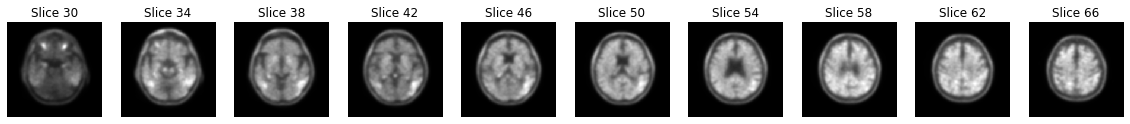

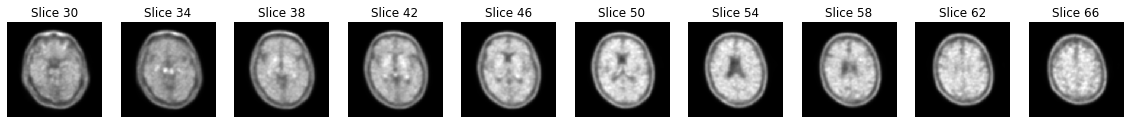

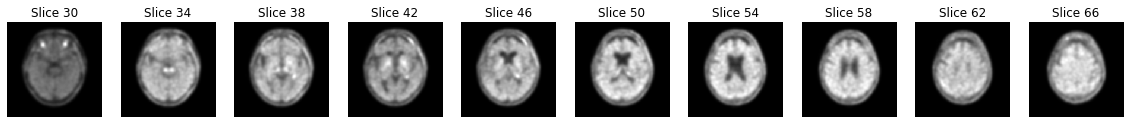

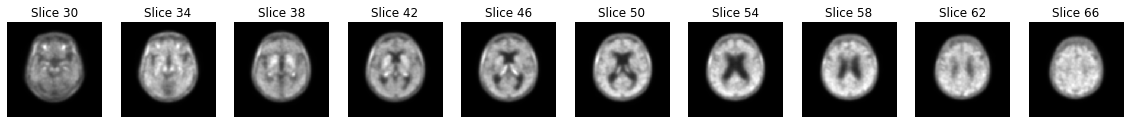

In [46]:
def show_slices(image):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    for i in range(10):
        axes[i].imshow(image[:, : ,i].T, cmap="gray", origin="lower")
        axes[i].axis('off')
        axes[i].set_title('Slice {}'.format(30 + 4 * i))

for i in range(len(ims)):
    ims[i] -= torch.min(ims[i])
    ims[i] /= torch.max(ims[i])
        
# false positive
show_slices(ims[-1,:,:,:,0])
# correct positive
show_slices(ims[-9,:,:,:,0])
# correct negative
show_slices(ims[0,:,:,:,0])
# false negative
show_slices(ims[-5,:,:,:,0])

In [41]:
holdout['PET CNN Prediction'] = y_hat
holdout.to_csv('../ADNI/processed_data/holdout_with_PET_ensemble.csv')

C:\Users\Ben\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
